In [18]:
import pandas as pd
from google.colab import files

# Step 1: Upload the dataset(s)
uploaded = files.upload()



# Step 2: Load the datasets
data = pd.read_csv(next(iter(uploaded)))


# Step 3: Inspect the first few rows of each dataset
print(" Dataset:")
print(data1.head())



Saving car data.csv to car data.csv
 Dataset:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load data
car_data = pd.read_csv('car data.csv')

# Check for missing values
car_data.isnull().sum()

# Feature selection
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for numerical and categorical features
numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline that includes the preprocessor and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [20]:
# Predict the test set results
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Absolute Error: 0.6101344262295083
R² Score: 0.9641274851604863


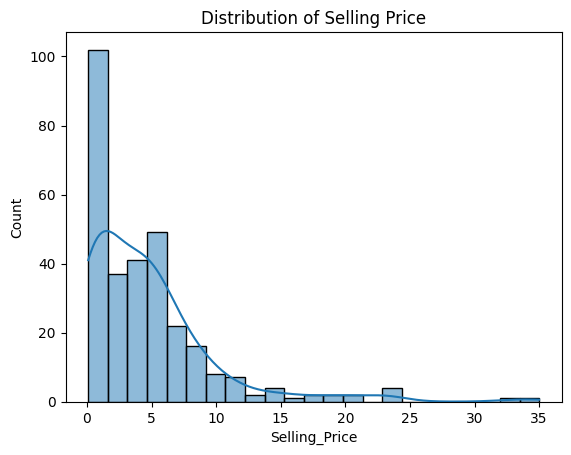

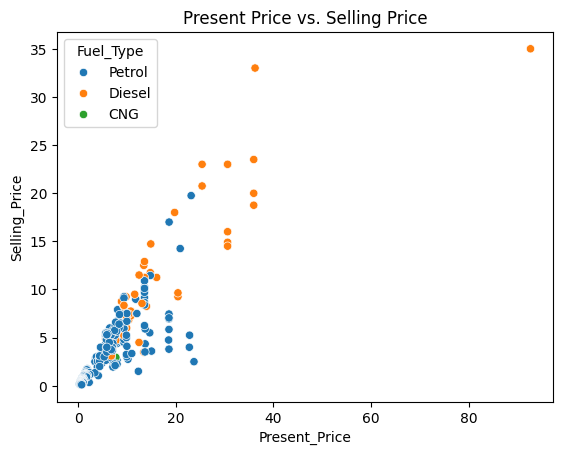

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the Selling Price
sns.histplot(car_data['Selling_Price'], kde=True)
plt.title('Distribution of Selling Price')
plt.show()

# Relationship between Present Price and Selling Price
sns.scatterplot(x=car_data['Present_Price'], y=car_data['Selling_Price'], hue=car_data['Fuel_Type'])
plt.title('Present Price vs. Selling Price')
plt.show()



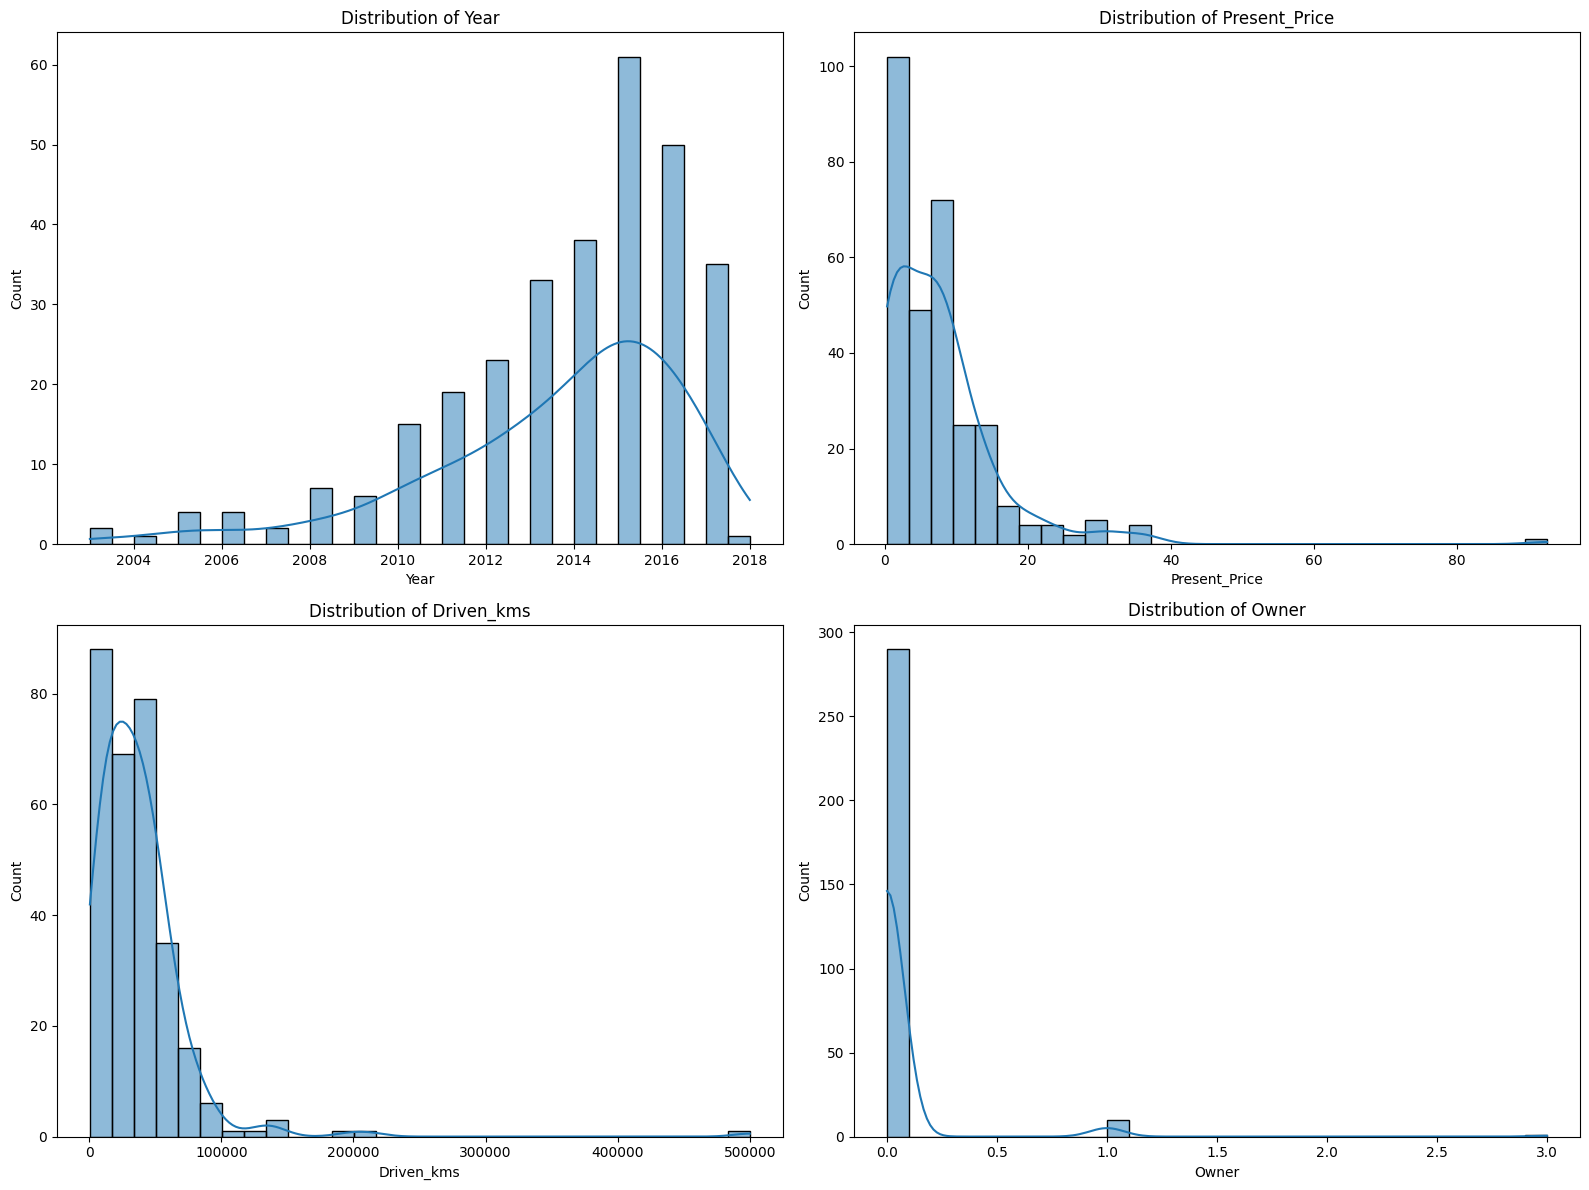

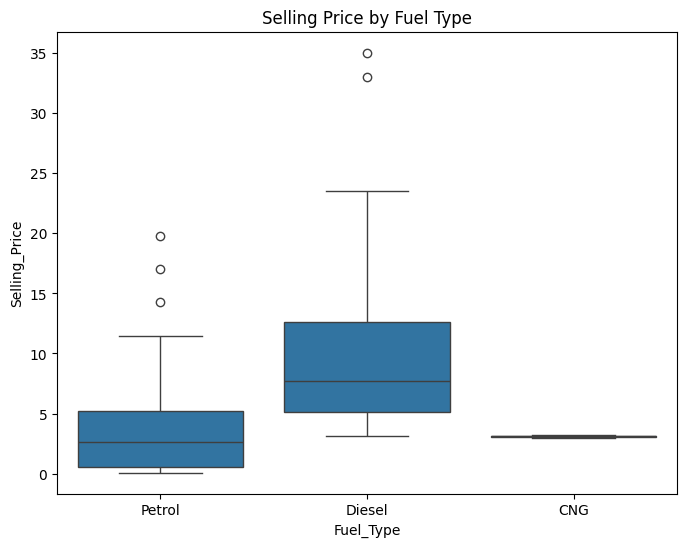

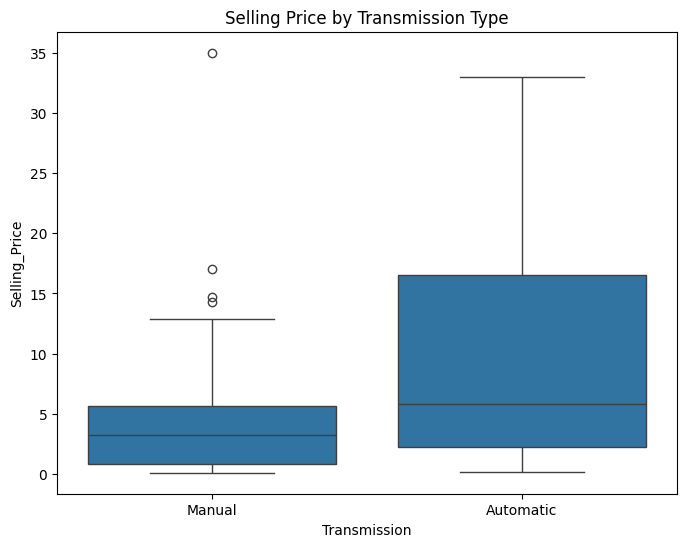

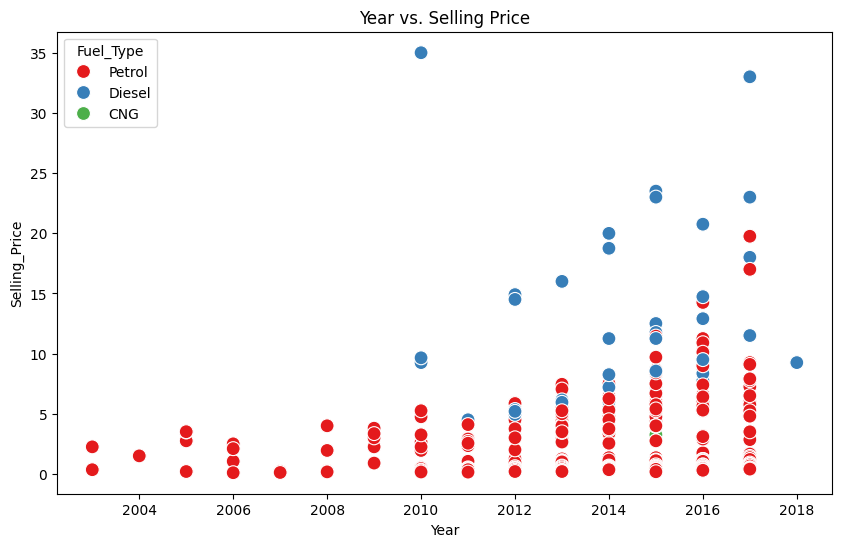

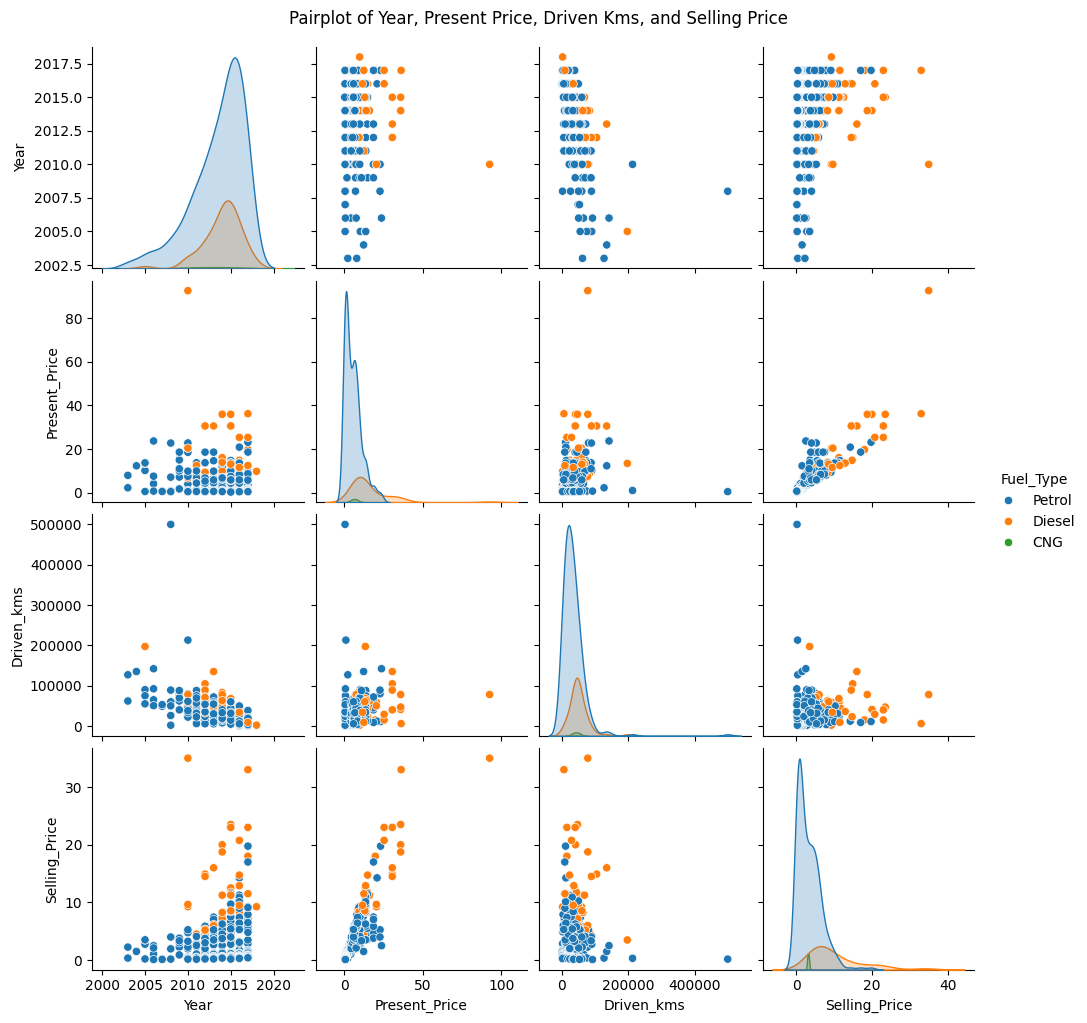

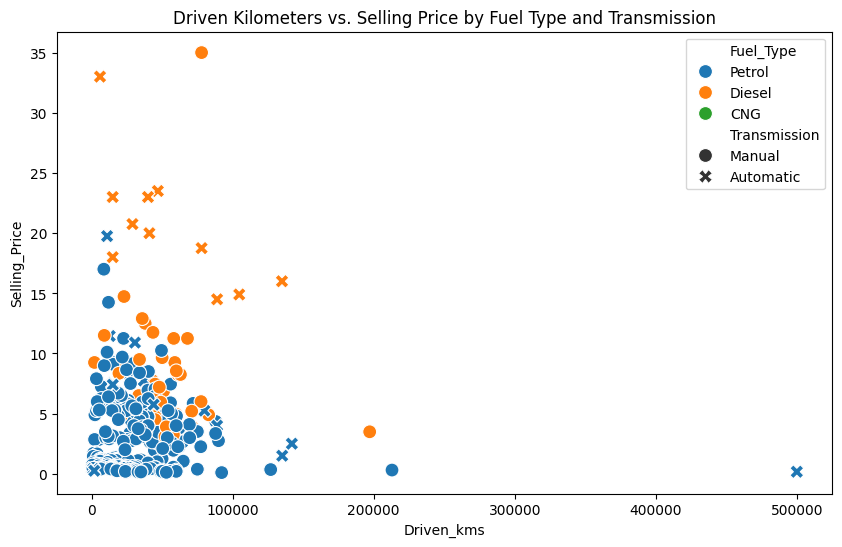

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# List of numerical features
numeric_features = ['Year', 'Present_Price', 'Driven_kms', 'Owner']

# Plot distribution for each numerical feature
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(car_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()
# Boxplot to show the distribution of Selling Price across different Fuel Types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=car_data)
plt.title('Selling Price by Fuel Type')
plt.show()
# Boxplot to show the distribution of Selling Price across different Transmission Types
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=car_data)
plt.title('Selling Price by Transmission Type')
plt.show()
# Scatter plot to see how the Year of the car relates to Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=car_data, hue='Fuel_Type', palette='Set1', s=100)
plt.title('Year vs. Selling Price')
plt.show()
# Pairplot to visualize relationships between multiple numerical features
sns.pairplot(car_data, vars=['Year', 'Present_Price', 'Driven_kms', 'Selling_Price'], hue='Fuel_Type')
plt.suptitle('Pairplot of Year, Present Price, Driven Kms, and Selling Price', y=1.02)
plt.show()

# Scatter plot to visualize the relationship between Driven Kilometers and Selling Price, differentiated by Fuel Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=car_data, hue='Fuel_Type', style='Transmission', s=100)
plt.title('Driven Kilometers vs. Selling Price by Fuel Type and Transmission')
plt.show()
